<a href="https://colab.research.google.com/github/nellyiya/CodeAlpha_Task/blob/main/CNN_Inclass_Activity_Breakout3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clinton Tanaka Pikita - We could have gotten 100% if we worked quicker.

Gaius Irakiza - i think we needed more Training data to make our model more robust.

Nelly Iyabikoze-I think we could have clarified the task requirements earlier and be quick in order to get 100 pts.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [ ]:
import numpy as np
from PIL import Image
import os

def load_and_preprocess_images(image_paths, target_size=(28, 28)):
    if len(image_paths) < 3:
        raise ValueError("At least 3 images are required.")

    images = []
    for path in image_paths:
        if not os.path.exists(path):
            print(f"Warning: File not found - {path}")
            continue
        try:
            # Open and convert to grayscale
            img = Image.open(path).convert('L')
            # Resize
            img = img.resize(target_size)
            # Convert to array and normalize
            img_array = np.array(img).reshape(*target_size, 1) / 255.0
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
            continue

    if len(images) < 3:
        raise ValueError("Fewer than 3 valid images could be loaded.")

    return np.array(images)

# Use your confirmed paths
image_paths = [
    "/content/cow-lonely-on-path-field-600nw-2136121547.webp",
    "/content/istockphoto-126220191-612x612.jpg",
    "/content/istockphoto-1372328440-612x612.jpg"
]

# Process images
processed_images = load_and_preprocess_images(image_paths)
print("Processed images shape:", processed_images.shape)


Processed images shape: (3, 28, 28, 1)


In [ ]:
# Load and preprocess
X_train = load_and_preprocess_images(image_paths)

# labels
y_train = np.array([0, 1, 0])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (3, 28, 28, 1)
y_train shape: (3,)


In [ ]:
# Create the CNN model
model = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(2, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(312, activation='relu'),
    Dense(24, activation='softmax')
])

In [ ]:
# Add model summary here
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 2)      │            38 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 312)            │       160,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 24)             │         7,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,962 (2.89 MB)

 Trainable params: 757,962 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 3.1797
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.0490
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 2.9143
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 2.7449
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 2.5235
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 1.0000 - loss: 2.2322
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 1.8565
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 1.3846
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.8491
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.3901


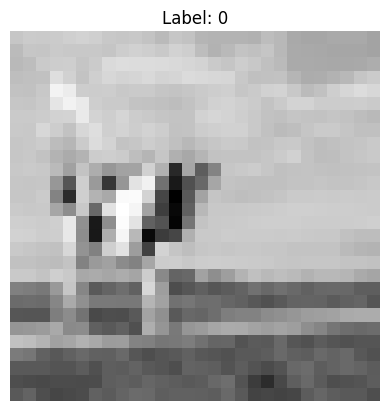

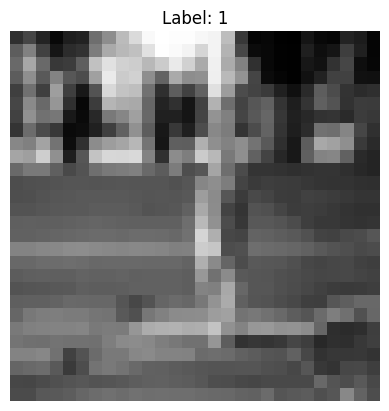

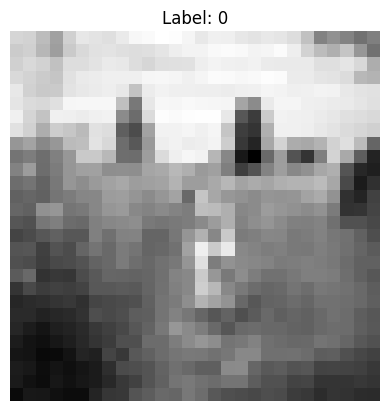

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(X_train)):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()
